In [211]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.optimizers import *
from keras.callbacks import Callback
import matplotlib

from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

In [358]:
N = 100
x_train = np.random.rand(N, 2)

def f(x_train):
    y_train = np.sin(x_train[:,0]**2 - x_train[:,1])
    return y_train

def plot_scalar_function(f, rng, model = False):
    """
    f -> function
    rng -> unit domain over dimensions
    model -> boolean
            If True: Keras Model
            else: Numpy Model
    """
    x = y = np.arange(-rng, rng, 0.05)
    X, Y = np.meshgrid(x, y)
    XX = np.vstack([np.ravel(X), np.ravel(Y)]).T
    
    if model:
        zs = f.predict(XX)
    else:
        zs = f(XX)
        
    Z = zs.reshape(X.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()
    
def generate_keras_data(f, rng, N):
    """
    f -> Known numpy function
        Takes (N,2) Array 
        
    N -> number of samples
    
    rng -> size of square to sample over
        
    returns x_train, y_train
    
    x_train.shape = (2,N)
    y_train.shape = (1,N)
    """
    
    x_train = rng*(np.random.rand(N,2) - 0.5)
    y_train = np.expand_dims(f(x_train),1)
    
    return x_train, y_train

class grad_viewer(Callback):
    """
    Testing class to get items each call back!
    """
    def __init__(self, viewer_generator, num_variables = 1, log = True):
        """
        Uses generate_keras_data to find sample grad!
        """
        self.validation_data = None
        self.model = None
        self.viewer_generator = viewer_generator
        self.num_variables = num_variables
        self.log = log
        self.built = False
        
        #### Select Random Layer, Random Varaible to keep track of
        #[f(x) if condition else g(x) for x in sequence]
        self.dense_layers = [i for (i,layer) in enumerate(model.layers)
                             if isinstance(layer, keras.layers.core.Dense)]
        self.dense_layers
        
    def on_batch_end(self, batch, logs=None):
        """
        grads show up in form:
        grads = []
        for layer in model.layers:
            grads.append(layer.gradients, bias.gradients)
        """
        if not self.built:
            weights = self.model.trainable_weights
            gradients = self.model.optimizer.get_gradients(self.model.total_loss, weights)
            input_tensors = self.model.inputs + self.model.sample_weights + self.model.targets + [K.learning_phase()]
            get_gradients = K.function(inputs=input_tensors, outputs=gradients)
            self.get_gradients = get_gradients
            self.built = True
        
        x, y = next(self.viewer_generator)
        inputs = [x, # X
                  [1], # sample weights
                  y, # y
                  0] # learning phase in TEST mode
                     
        grads = self.get_gradients(inputs)
        print(self.model.layers[0].get_weights())
        
        
def create_synced_generators(f, rng, batch_size):
    """
    returns two generators (Identical)
    (fit_generator, viewer_generator)
    """
    start_seed = 42
    fit_generator = generator(f, rng, batch_size, start_seed)
    viewer_generator = generator(f, rng, batch_size, start_seed)
    return fit_generator, viewer_generator
        
def generator(f, rng, batch_size, seed):
    # Create empty arrays to contain batch of features and labels#
    while True:
        np.random.seed(seed)
        x_train, y_train = generate_keras_data(f, rng, batch_size)
        seed += 1
        yield x_train, y_train 

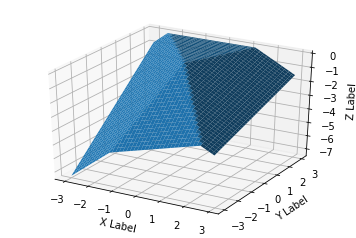

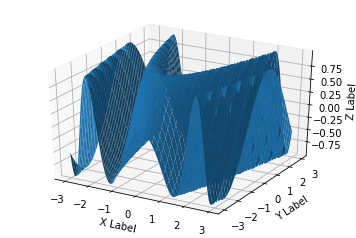

In [351]:
plot_scalar_function(model, 3, True)
plot_scalar_function(f,3)

In [276]:
x_train, y_train = generate_keras_data(f, 3, 10000)
print(x_train.shape)
print(y_train.shape)

(100000, 2)
(100000, 1)


In [334]:
opt = Adam()

In [347]:
model = Sequential()

model.add(Dense(units=2, activation='relu', input_dim=2))
model.add(Dense(units=1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer=opt,
              metrics=['accuracy'])

print(model.count_params())

(<type 'basestring'>,)
<class 'keras.optimizers.Optimizer'>
9


[0, 1]

In [359]:
#model.fit(x_train,y_train, epochs = 10)
x,y = create_synced_generators(f, 3, 10)
model.fit_generator(x, epochs = 10, steps_per_epoch= 1, verbose=1, 
          callbacks=[grad_viewer(y)])

Epoch 1/10
[array([[ 1.0014107 , -1.0445405 ],
       [-0.43233708, -0.8356643 ]], dtype=float32), array([-0.02527078, -0.02504964], dtype=float32)]
1/1 [==============================] - 4s 4s/step - loss: 3.2684 - acc: 0.0000e+00
Epoch 2/10
[array([[ 1.0005734 , -1.043497  ],
       [-0.43143204, -0.8346834 ]], dtype=float32), array([-0.02623131, -0.02615389], dtype=float32)]
1/1 [==============================] - 0s 13ms/step - loss: 3.8272 - acc: 0.0000e+00
Epoch 3/10
[array([[ 0.9996698, -1.0425559],
       [-0.4304856, -0.8337263]], dtype=float32), array([-0.02724359, -0.02720251], dtype=float32)]
1/1 [==============================] - 0s 12ms/step - loss: 2.4639 - acc: 0.0000e+00
Epoch 4/10
[array([[ 0.99867535, -1.0416007 ],
       [-0.4296217 , -0.83273864]], dtype=float32), array([-0.02829792, -0.02826077], dtype=float32)]
1/1 [==============================] - 0s 19ms/step - loss: 4.1633 - acc: 0.0000e+00
Epoch 5/10
[array([[ 0.9976666 , -1.0406685 ],
       [-0.42874148, -0

In [50]:
reload(gradient_viewer)

<module 'gradient_viewer' from 'gradient_viewer.pyc'>

In [13]:
model.fit(x_train_flat,y_train, epochs=2, steps_per_epoch= 1, callbacks = [gradient_viewer.TestCallBack(x_sample, y_sample)])

Epoch 1/2


FailedPreconditionError: Attempting to use uninitialized value dense_1/kernel
	 [[Node: _retval_dense_1/kernel_0_0 = _Retval[T=DT_FLOAT, index=0, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dense_1/kernel)]]